['79', '93', '80', '86', '81', '84', '89', '91', '75', '77', '90', '82', '76', '78', '85', '73', '88', '87', '92', '83', '70', '72', '71', '74']


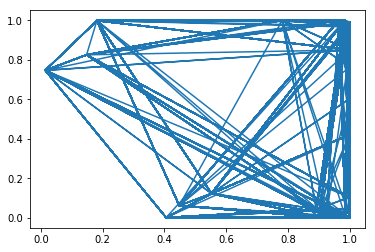

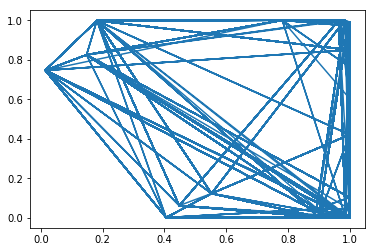

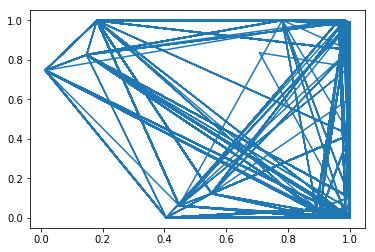

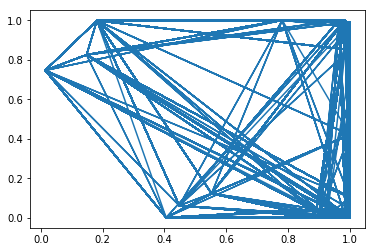

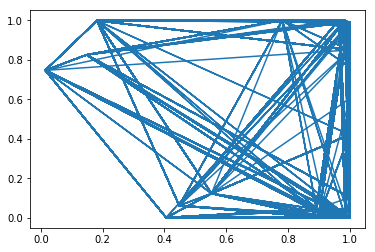

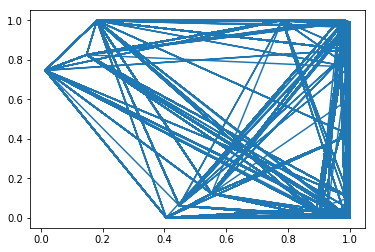

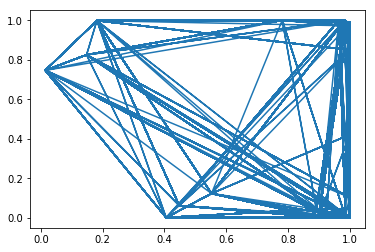

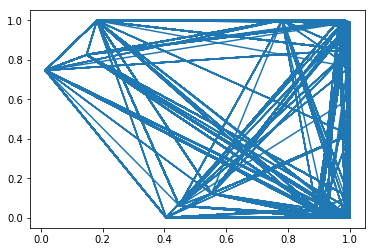

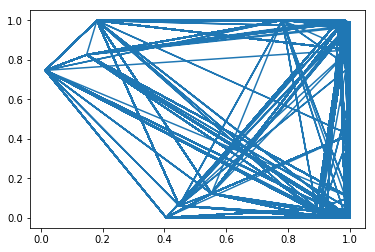

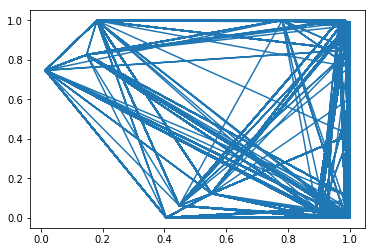

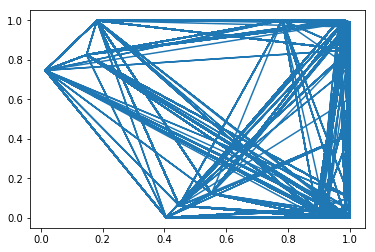

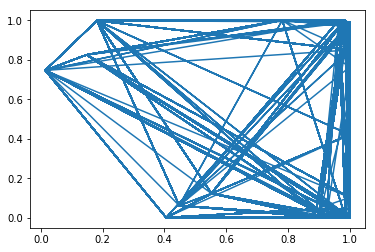

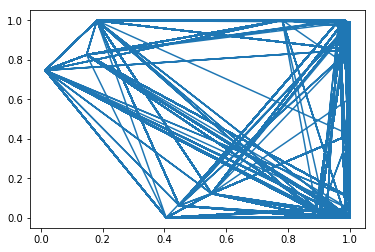

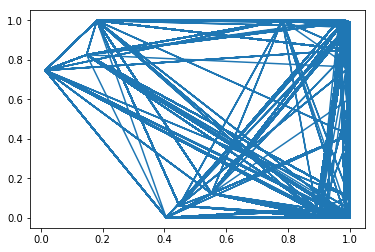

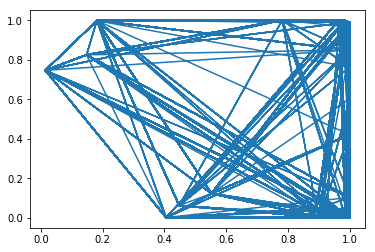

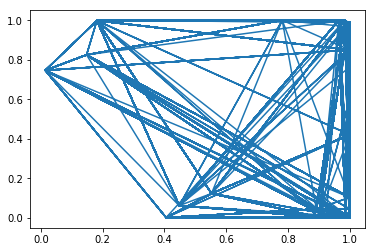

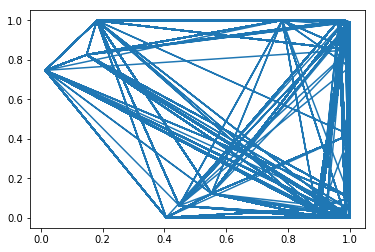

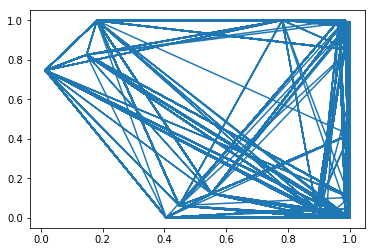

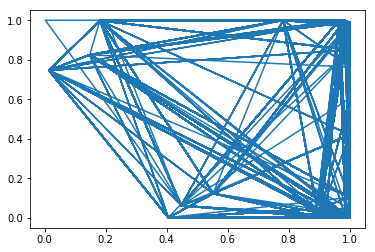

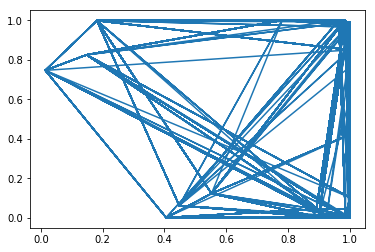

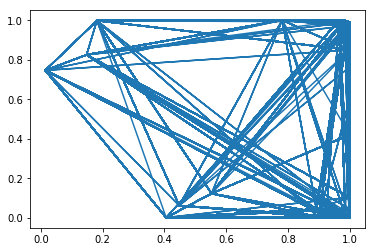

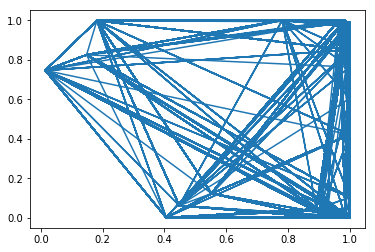

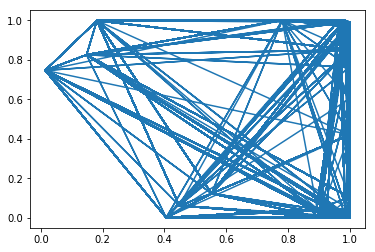

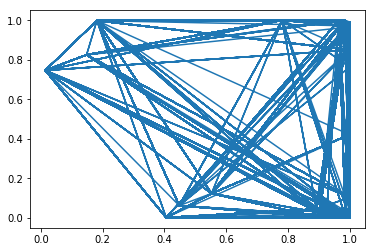

In [43]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import save_model, load_model
from keras import utils

import numpy as np
import pandas as pd 
import os
import sys

#указываем путь к данным и заружаем обученную модель
path = './data/test/'
test_exp = os.listdir(path)
print(test_exp)
model = load_model('my_model.h5')

#запускаем цикл предсказания траекторий
for i in range(len(test_exp)):
    #загружаем данные
    exp = path + test_exp[i] + '/'
    tables = sorted(os.listdir(path + test_exp[0]))
    
    acc = pd.read_csv(exp + tables[0], index_col=0)
    gyro = pd.read_csv(exp + tables[1], index_col=0)
    
    acc.columns = ['xa', 'ya','za','ta']
    gyro.columns = ['xg', 'yg', 'zg', 'tg']
    
    #форматируем и нормализуем их
    data = pd.concat([acc, gyro], axis=1)
    Test_X = data[['xa','ya','za','xg', 'yg' ,'zg']]
    Test_X = Test_X.to_numpy().reshape(Test_X.shape[0], 1, Test_X.shape[1])
    Test_X = utils.normalize(Test_X, axis = 1)
    
    #предсказываем траекторию человека
    Test_Y = model.predict(Test_X)
    
    #выводим реузльтат на экран и сохраняем данные в соответствующую папку эксперимента
    pyplot.plot(Test_Y[::,0], Test_Y[::, 1])
    pyplot.show()
    Test_Y = pd.DataFrame(data = Test_Y[::, ::], columns = ['x','y'])
    Test_Y['tmsp'] = acc['ta']
    Test_Y.to_csv(exp + '/trajectory.csv')


In [44]:
"""
Этот блок сделан для расчета среднеквадратичной ошибки
многие функции здесь дублируют функции блоком выше
"""
#подгрузка данных и их форматирование
path = './data/train/'
test_exp = os.listdir(path)
model = load_model('my_model.h5')

exp = path + test_exp[5] + '/'
tables = sorted(os.listdir(path + test_exp[0]))
  
acc = pd.read_csv(exp + tables[0], index_col=0)
gyro = pd.read_csv(exp + tables[1], index_col=0)
trajectory  = pd.read_csv(exp + tables[2], index_col=0)

acc.columns = ['xa', 'ya','za','ta']
gyro.columns = ['xg', 'yg', 'zg', 'tg']
    
data = pd.concat([acc, gyro, trajectory], axis=1)

#непосредственно сам блок расчета rsme
x_trained = data[['xa','ya','za','xg', 'yg' ,'zg']]
x_trained = x_trained.to_numpy().reshape(x_trained.shape[0], 1, x_trained.shape[1])
x_trained = utils.normalize(x_trained, axis = 1)

y_trained = data[['x', 'y']]

y_calculated = model.predict(x_trained)

rmse = sqrt(mean_squared_error(y_trained, y_calculated))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.228
